In [1]:
include("load_save.jl")
R, X, Y, L, F, Y, PY = load_big_dataset("GB1", val_mode=true);
R1, X1, Y1, L1, F1, Y1, PY1 = load_big_dataset("GB1p", val_mode=true);
R2, X2, Y2, L2, F2, Y2, PY2 = load_big_dataset("gGB1", val_mode=true);

Dataset : GB1_C


Dataset : GB1p_F


Dataset : gGB1_B


In [2]:
using Combinatorics, PyPlot, Printf

In [3]:
data_vector = [(L, F, "GB1_C"), (L1, F1, "GB1p_F"), (L2, F2, "gGB1_B")]
data_ind_vector = [(1, 2), (1, 3)];

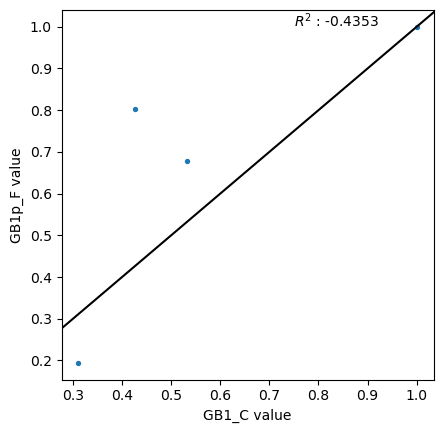

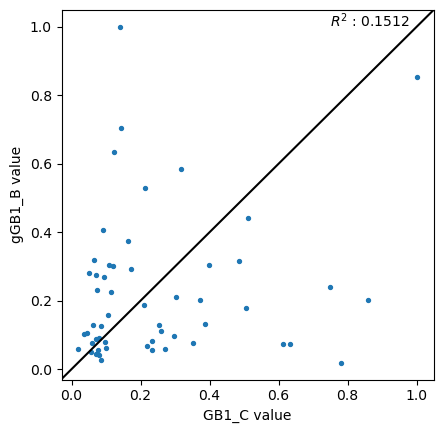

In [4]:
for (i1, i2) in data_ind_vector
    l1, f1, n1 = data_vector[i1]
    l2, f2, n2 = data_vector[i2]
    l1data = sort(collect(zip(f1, l1)), by = x -> -x[1])
    l2data = sort(collect(zip(f2, l2)), by = x -> -x[1])

    x = Vector{Float64}()
    y = Vector{Float64}()
    for (F, L) in l1data
        l2rank = findfirst(x -> x[2] == L, l2data)
        if !isnothing(l2rank)
            push!(x, F)
            push!(y, l2data[l2rank][1])
        end
    end
    x ./= maximum(x)
    y ./= maximum(y)

    figure(figsize=(4.8, 4.8))
    scatter(x, y, s=8)
    xl = xlim(); yl = ylim()
    plot([-2, 2], [-2, 2], color="black")
    xlim(xl...); ylim(yl...)
    annotate((@sprintf "\$R^2\$ : %.4f" r2(x, y)), (0.75, 1))
    xlabel(n1 * " value")
    ylabel(n2 * " value")
    display(gcf())
    close("all")
end

In [6]:
l1, f1, n1 = data_vector[1]
l2, f2, n2 = data_vector[2]
l1data = sort(collect(zip(f1, l1)), by = x -> -x[1])
l2data = sort(collect(zip(f2, l2)), by = x -> -x[1])

x = Vector{Float64}()
y = Vector{Float64}()
l = Vector{Int}()
for (F, L) in l1data
    l2rank = findfirst(x -> x[2] == L, l2data)
    if !isnothing(l2rank)
        push!(x, F)
        push!(y, l2data[l2rank][1])
        push!(l, L)
    end
end
x ./= maximum(x)
y ./= maximum(y)

println("GB1 vs. GB1p")
for (_x, _y, _l) in zip(x, y, l)
    @printf "Loacation %d : %.4f %.4f\n" _l _x _y
end

GB1 vs. GB1p
Loacation 41 : 1.0000 1.0000
Loacation 39 : 0.5326 0.6772
Loacation 54 : 0.4261 0.8019
Loacation 40 : 0.3112 0.1945
